In [4]:
import numpy as np
import  cv2
from matplotlib.image import imread
from matplotlib import pyplot as plt
import pandas as pd

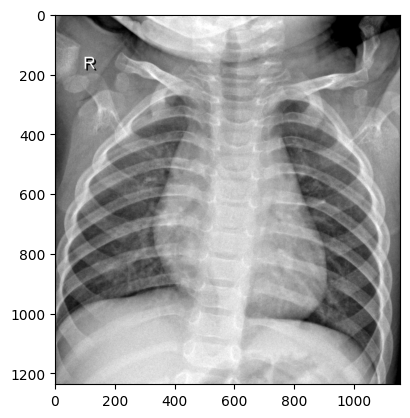

In [5]:
img1=plt.imread('/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Normal/IM-0140-0001.jpeg')
plt.imshow(img1, cmap='gray')

In [6]:
img1.shape

(1237, 1156)

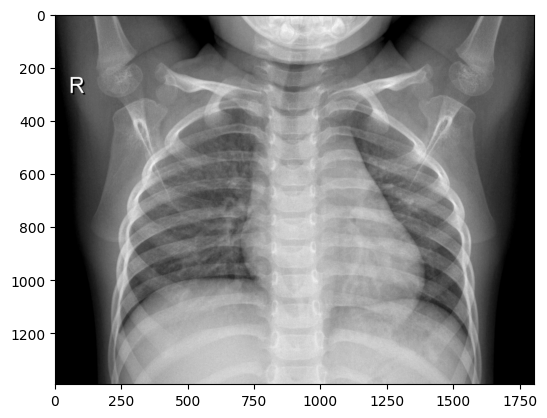

In [7]:
img2 = plt.imread('/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Normal/IM-0241-0001.jpeg')
plt.imshow(img2, cmap='gray')

In [8]:
img2.shape

(1392, 1806)

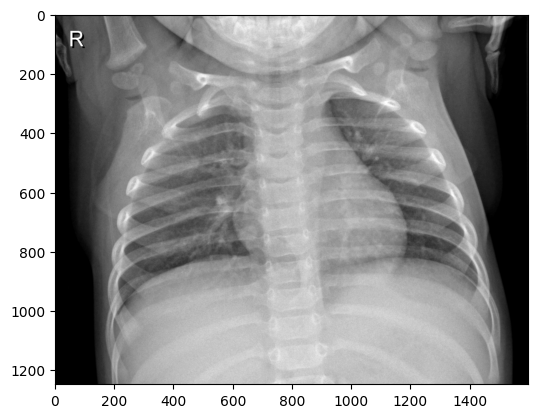

In [9]:
img3 = plt.imread('/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Normal/IM-0704-0001.jpeg')
plt.imshow(img3, cmap='gray')

In [10]:
img3.shape

(1248, 1596)

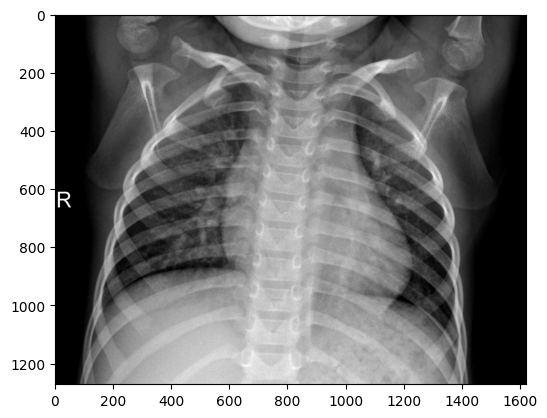

In [11]:
img4 = plt.imread('/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Normal/NORMAL2-IM-0589-0001.jpeg')
plt.imshow(img4, cmap='gray')

#covid image cases

In [12]:
img_c1 = '/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png'
img_c2 = '/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png'
img_c3 = '/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Covid/16663_1_1.jpg'
img_c4 = '/content/drive/MyDrive/Ai course materials/COVID-Images/Train/Covid/2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg'

In [13]:
img_c1 = plt.imread(img_c1)
img_c2 = plt.imread(img_c2)
img_c3 = plt.imread(img_c3)
img_c4 = plt.imread(img_c4)

In [14]:
#create a figure and axes obj

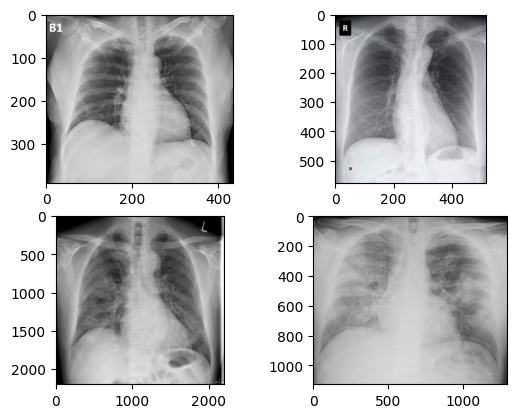

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
#display image on each of the axes pbjects
axes[0,0].imshow(img_c1, cmap='gray')
axes[0,1].imshow(img_c2, cmap='gray')
axes[1,0].imshow(img_c3, cmap='gray')
axes[1,1].imshow(img_c4, cmap='gray')

# show the fig
plt.show()

In [16]:
image_shape = (1000,1000,3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Dropout(0.3))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 998, 998, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 499, 499, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 497, 497, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 248, 248, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 246, 246, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 123, 123, 128)     0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
batch_size = 16

In [24]:
train_path='/content/drive/MyDrive/Ai course materials/COVID-Images/Train'

train_image_gen = img_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 288 images belonging to 2 classes.


In [25]:
test_path='/content/drive/MyDrive/Ai course materials/COVID-Images/Val'

test_image_gen = img_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
model.fit(train_image_gen,epochs=5,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/5
18/18 [==============================] - 298s 16s/step - loss: 13548.3643 - accuracy: 0.5556 - val_loss: 367.2402 - val_accuracy: 0.6667
Epoch 2/5
18/18 [==============================] - 98s 6s/step - loss: 236.8418 - accuracy: 0.8090 - val_loss: 157.4916 - val_accuracy: 0.8500
Epoch 3/5
18/18 [==============================] - 100s 6s/step - loss: 163.5873 - accuracy: 0.8507 - val_loss: 54.2939 - val_accuracy: 0.9333
Epoch 4/5
18/18 [==============================] - 96s 5s/step - loss: 60.9591 - accuracy: 0.9271 - val_loss: 55.4973 - val_accuracy: 0.9167
Epoch 5/5
14/18 [======================>.......] - ETA: 18s - loss: 46.5172 - accuracy: 0.9062

In [ ]:
model.evaluate(test_image_gen)

4/4 [==============================] - 16s 4s/step - loss: 57.2570 - accuracy: 0.9000


[57.257015228271484, 0.8999999761581421]